### Task 2 Data description

Importing pandas library

In [1]:
import pandas as pd

loading dataset from the csv file using read_csv function

In [2]:
data = pd.read_csv('dataset.csv')

Understanding the data values from initial 5 rows of the data

In [3]:
data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


Histogram of price with varying range max, median and mean

<AxesSubplot:ylabel='Frequency'>

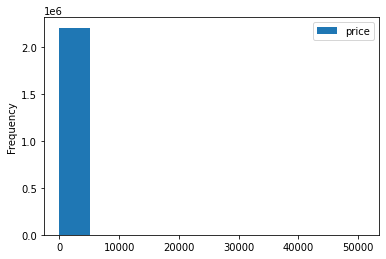

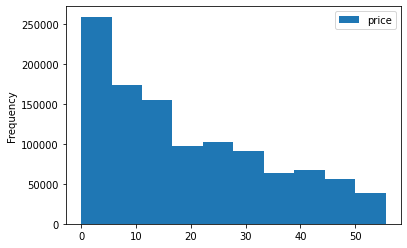

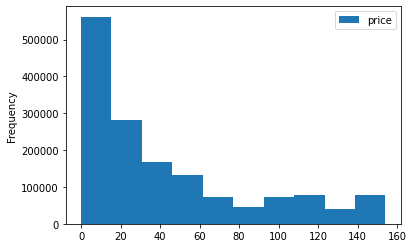

In [4]:
min_price = data["price"].min()
data.plot.hist(column=["price"], bins=10, range = [min_price, data["price"].max()])
data.plot.hist(column=["price"], bins=10, range = [min_price, data["price"].median()])
data.plot.hist(column=["price"], bins=10, range = [min_price, data["price"].mean()])

Converting type of event_time from str to timestamp

In [5]:
data["event_time"] = pd.to_datetime(data["event_time"])
type(data["event_time"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Adding columns time_hours and weekday as per below description:
time_hours (Integer): Which hour of the day was the purchase
made?
weekday (integer): On which day of the week was the purchase
made?

In [6]:
data["time_hours"] = data["event_time"].apply(lambda t: t.hour)
data["weekday"] = data["event_time"].apply(lambda t:t.dayofweek)

"samsung" brand had the most sales volume. Plotting the graph of the top 5 brands comparing their sales volume

<AxesSubplot:xlabel='brand'>

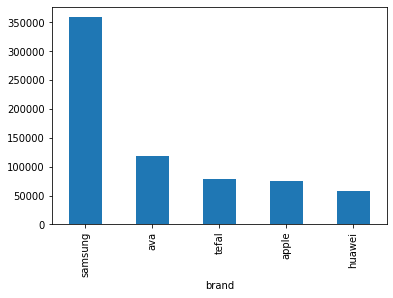

In [7]:
top5_brands = data.groupby('brand').size().sort_values(ascending=False)[:5]
top5_brands.plot.bar(x = 'brand', y = 'sales volume')

category_code "electronics.camera.video" has the highest average price

In [8]:
data.groupby("category_code").mean("price").sort_values(by = ["price"], ascending=False)[:1]

,order_id,product_id,category_id,price,user_id,time_hours,weekday
category_code,,,,,,,
electronics.camera.video,2.371884e+18,1.973716e+18,2.268105e+18,620.71345,1.515916e+18,9.350877,2.71345


"ava" brand and "computers.peripherals.mouse" category has the most sales of a price of under 20 currency units

In [9]:
price_less_than_20 = data.loc[data["price"] < 20]
print(price_less_than_20.groupby("category_code").size().sort_values(ascending=False)[:1])
print(price_less_than_20.groupby("brand").size().sort_values(ascending=False)[:1])

category_code
computers.peripherals.mouse    34608
dtype: int64
brand
ava    59979
dtype: int64


Function that plots the distribution of the sales volume over the weekdays

In [10]:
def plot_distribution(data):
    ByWeekDay = data.groupby("weekday").size()
    ByWeekDay.plot.bar(x = "weekday", y = "sales volume")

Function call

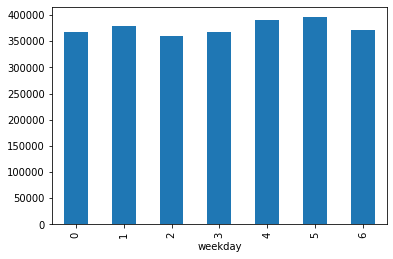

In [11]:
plot_distribution(data)

### Task 3

Function with two inputs, X and Y, that calculates the total cost of sales volume of category X(String) in year Y(int)

In [12]:
def total_cost_sales_volume(X, Y):
    data["year"] = data["event_time"].apply(lambda t: t.year)
    data_year_Y = data.loc[data["year"] == Y]
    data_category_X = data_year_Y.loc[data["category_code"] == X]
    return data_category_X['price'].sum()  

In [17]:
X = "electronics.camera.video"
Y = 2020
total_cost = total_cost_sales_volume(X, Y)
print("Total cost of sales volume for category " + X + " in year Y " + str(Y) + " is " + str(total_cost))

Total cost of sales volume for category electronics.camera.video in year Y 2020 is 106142.0
